# **LSTM: Stock Prediction**

* **1.) What was the change in price of the stock over time?**
* **2.) What was the daily return of the stock on average?**
* **3.) What was the moving average of the various stocks?**
* **4.) What was the correlation between different stocks'?**
* **5.) How much value do we put at risk by investing in a particular stock?**
* **6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)**

<hr>

# **Step 1 - Importing the libraries**

**Configuration Libraries**

In [ ]:
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

**Common Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

<hr>

# **Step 2 - Data Gathering Phase**

**We need our stock API**

In [ ]:
!pip install yfinance # IN CASE THIS ERROR, TRY UPDATING THE IDE THAT YOU ARE USING

In [ ]:
import yfinance as yf

<hr>

**Grasp the data from the API**

In [ ]:
data = yf.Ticker("AAPL")

**I need to also distribute the data based on a data**

In [ ]:
hist = data.history(period = "1mo")

In [ ]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-21 00:00:00-04:00,234.192340,236.589712,234.192340,236.220108,36254500,0.00,0.0
2024-10-22 00:00:00-04:00,233.632963,235.960405,232.344388,235.600800,38846600,0.00,0.0
2024-10-23 00:00:00-04:00,233.822752,234.881585,227.509690,230.506393,52287000,0.00,0.0
2024-10-24 00:00:00-04:00,229.727257,230.566345,228.158990,230.316620,31109500,0.00,0.0
2024-10-25 00:00:00-04:00,229.487523,232.963694,229.317711,231.155685,38802300,0.00,0.0
2024-10-28 00:00:00-04:00,233.063595,234.472034,232.294437,233.143494,36087100,0.00,0.0
2024-10-29 00:00:00-04:00,232.843827,234.072471,232.064686,233.413193,35417200,0.00,0.0
2024-10-30 00:00:00-04:00,232.354358,233.213414,229.297724,229.847122,47070900,0.00,0.0
2024-10-31 00:00:00-04:00,229.087951,229.577418,225.122313,225.661728,64370100,0.00,0.0


**Description of the organization using the stock data**

In [ ]:
data.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

**Convert the data into datetime format**

In [ ]:
current_date = datetime.now()

In [ ]:
current_date

datetime.datetime(2024, 11, 21, 2, 24, 10, 591668)

* **Start Date = Current_Date (Year = 2024) - 1 = 2023**
* **Current_Date.month = Nov**
* **Current_Data.day - 1 = 20 - 1 = 19**
* **Start_Date = 19th Nov 2023**

In [ ]:
start_date = datetime(current_date.year - 1, current_date.month, current_date.day - 1)

In [ ]:
start_date

datetime.datetime(2023, 11, 20, 0, 0)

**Now, I will be working on the data of 1 complete year. We are firstly specified our date range, in which we want to work and then we have got the data of that particular time-frame, done using yfinance**

In [ ]:
data = yf.download("AAPL", start_date, current_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-11-20 00:00:00+00:00,190.516647,191.449997,191.910004,189.880005,189.889999,46505100
2023-11-21 00:00:00+00:00,189.710602,190.639999,191.520004,189.740005,191.410004,38134500
2023-11-22 00:00:00+00:00,190.377335,191.309998,192.929993,190.830002,191.490005,39617700
2023-11-24 00:00:00+00:00,189.043854,189.970001,190.899994,189.250000,190.869995,24048300
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-20 00:00:00+00:00 to 2024-11-20 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Close, AAPL)      253 non-null    float64
 2   (High, AAPL)       253 non-null    float64
 3   (Low, AAPL)        253 non-null    float64
 4   (Open, AAPL)       253 non-null    float64
 5   (Volume, AAPL)     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


**Column header preprocessing**

In [ ]:
data.columns = [f"{col[0]}" for col in data.columns]

In [ ]:
data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-20 00:00:00+00:00,190.516647,191.449997,191.910004,189.880005,189.889999,46505100
2023-11-21 00:00:00+00:00,189.710602,190.639999,191.520004,189.740005,191.410004,38134500
2023-11-22 00:00:00+00:00,190.377335,191.309998,192.929993,190.830002,191.490005,39617700
2023-11-24 00:00:00+00:00,189.043854,189.970001,190.899994,189.250000,190.869995,24048300
2023-11-27 00:00:00+00:00,188.864731,189.789993,190.669998,188.899994,189.919998,40552600


**Visualize the data**

In [ ]:
fig = px.line(data, x = data.index, y = "Adj Close", title = "Apple Stock Price")
fig.show()

**This data shows the upwards trend, there is no seasonality**

<hr>

**Data Description**

In [ ]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,201.005449,201.543794,203.212530,199.677905,201.400474,5.739746e+07
std,21.898718,21.723540,21.916319,21.357633,21.678936,3.034591e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,183.486069,184.250000,185.149994,182.229996,183.919998,4.213770e+07
50%,193.760773,194.500000,196.270004,193.589996,195.020004,5.008050e+07
75%,223.674728,224.179993,225.979996,221.910004,224.369995,6.351640e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


**As this is a stock data, so markets are closed on weekends and national holiday. Hence whenever you are going to work with the stock data, there would be difference due to the above mentioned**

In [ ]:
365 - 104

261

<Axes: xlabel='Adj Close', ylabel='Density'>

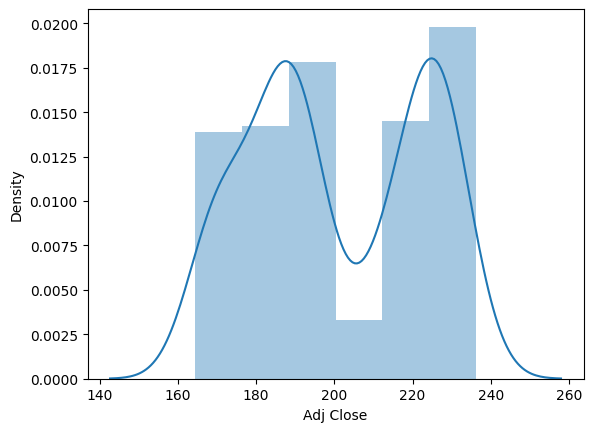

In [ ]:
sns.distplot(data["Adj Close"])

# **Step 3 - Information on Close Price**

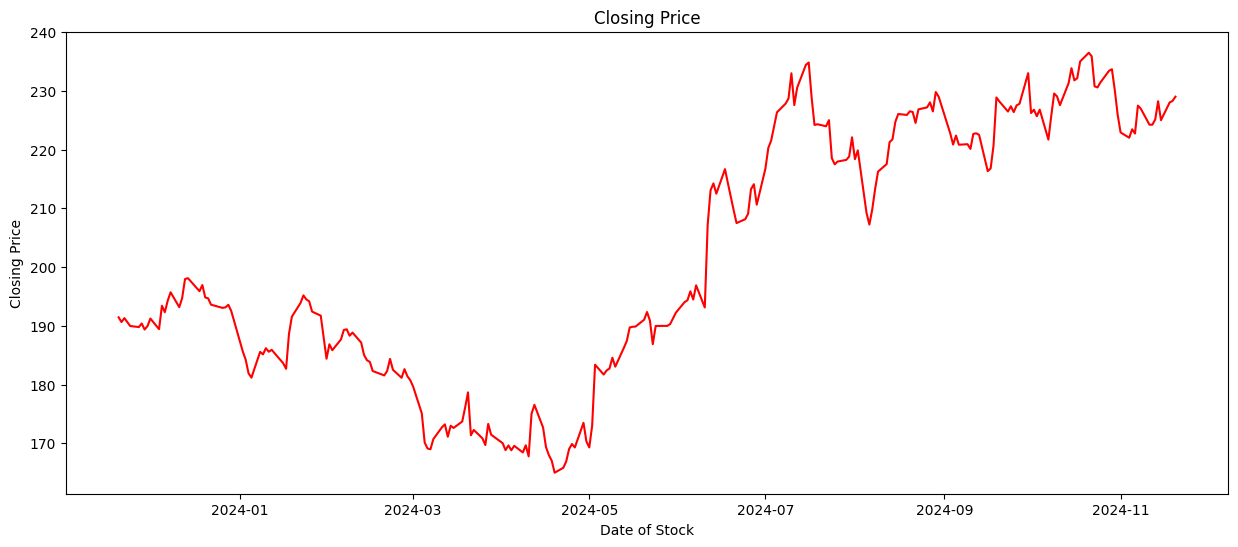

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(data.Close, color = "red")
plt.title("Closing Price")
plt.xlabel("Date of Stock")
plt.ylabel("Closing Price")
plt.show()

# **Step 4 - Information on the volumn of assests sold**

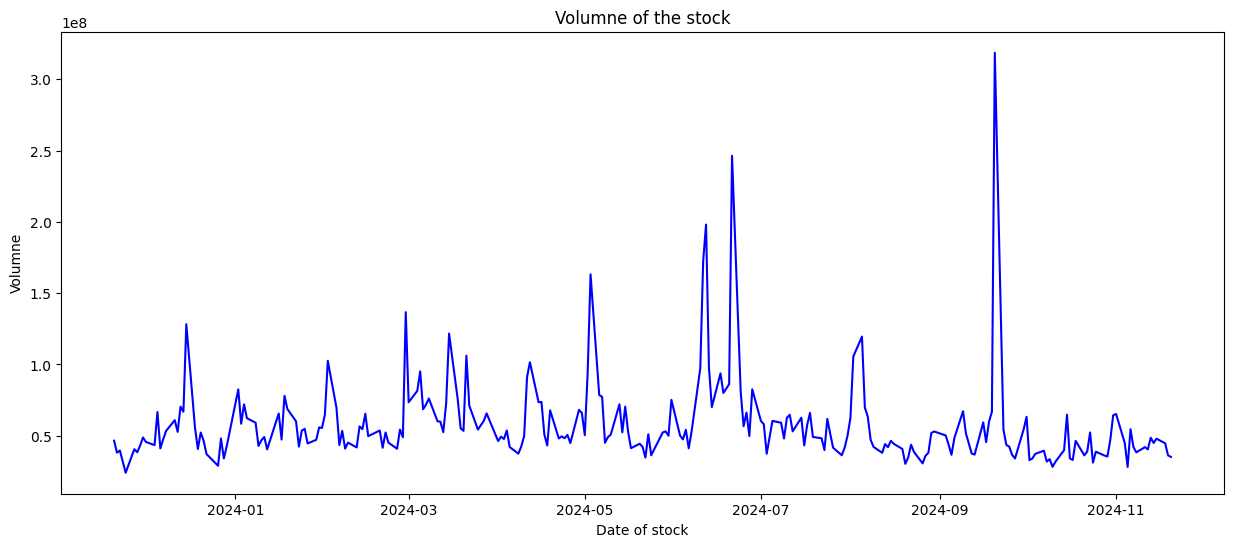

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(data.Volume, color = "blue")
plt.title("Volumne of the stock")
plt.xlabel("Date of stock")
plt.ylabel("Volumne")
plt.show()

**Using this graph, we can conclude that the trade of assests was normal in the intial phase. But as soon as we touched the mid-year, we can see a huge inflation in the volume of stock being traded**
  * **In May to October, there has been a lot of trading**

<hr>

# **Step 5 - Working with Moving Average**

In [ ]:
moving_average = [10, 20, 50]

for x in moving_average:
  column_name = f"MA for {x} days"
  data[column_name] = data["Close"].rolling(window = x).mean()

In [ ]:
fig = px.line(data, x = data.index, y = ["MA for 10 days", "MA for 20 days", "MA for 50 days"])
fig.show()

**Based on the graph:**
  * **The MA taken for 50 days, is not able to give us the complete information about the trends, it's too smooth with respect to data**
  * **If we talk about 10 days or 20 days, it seems more promising as it is able to capture more information about the data**
  * **`We can move forward with the MA data having average rolled between 10 or 20 days`**

<hr>

# **Step 6 - Daily Returns of the stock on based on Average**
  * **This will help us understand the risk associated with investment in a particular stock. So, to judge that we to look on the daily changes**

In [ ]:
data["Daily Return"] = data["Close"].pct_change()

In [ ]:
data["Daily Return"].head()

,Daily Return
Date,
2023-11-20 00:00:00+00:00,NaN
2023-11-21 00:00:00+00:00,-0.004231
2023-11-22 00:00:00+00:00,0.003514
2023-11-24 00:00:00+00:00,-0.007004
2023-11-27 00:00:00+00:00,-0.000948


**Visualize the percentage that has been changed from the last year**

In [ ]:
fig = px.line(data, x = "Daily Return", title = "Change in the stock on the daily basis")
fig.show()

**If we are investing in this stock, there exists a fair amount of chance that changest will be between -0.03 to 0.03**

* **Link to Ticket data: https://www.nasdaq.com/market-activity/stocks/screener**

<hr>

# **Step 7 - Training and Testing data**

In [ ]:
data = yf.download("AAPL", start = "2014-01-01", end = datetime.now())

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2014-01-02 00:00:00+00:00,17.234295,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.855732,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.947647,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.826441,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.933004,19.409286,19.484285,19.238930,19.243214,258529600
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,228.220001,228.220001,228.869995,225.000000,225.020004,44923900
2024-11-15 00:00:00+00:00,225.000000,225.000000,226.919998,224.270004,226.399994,47923700


In [ ]:
data.columns = [f"{col[0]}" for col in data.columns]

In [ ]:
data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-01-02 00:00:00+00:00,17.234295,19.754642,19.893929,19.715000,19.845715,234684800
2014-01-03 00:00:00+00:00,16.855732,19.320715,19.775000,19.301071,19.745001,392467600
2014-01-06 00:00:00+00:00,16.947647,19.426071,19.528570,19.057142,19.194643,412610800
2014-01-07 00:00:00+00:00,16.826441,19.287144,19.498571,19.211430,19.440001,317209200
2014-01-08 00:00:00+00:00,16.933004,19.409286,19.484285,19.238930,19.243214,258529600
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,228.220001,228.220001,228.869995,225.000000,225.020004,44923900
2024-11-15 00:00:00+00:00,225.000000,225.000000,226.919998,224.270004,226.399994,47923700
2024-11-18 00:00:00+00:00,228.020004,228.020004,229.740005,225.169998,225.250000,44686000


**Visualize**

In [ ]:
fig = px.line(data, x = data.index, y = "Close", title = "Apple Stock Price")
fig.show()

**Create a seperate dataset that will just have the close columns**

In [ ]:
df_close = data[["Close"]]

In [ ]:
len(df_close)

2741

**We will try to keep around 95% of the data for training purpose and rest will be used for testing purpose**

In [ ]:
train_len = int(np.ceil((len(df_close) * 0.95)))

<hr>

# **Step 8 - Building data for prediction phase**

* **Scaling the values**
  * **It is done to remove ahead-bias from the data**

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_scaled = scaler.fit_transform(df_close)

In [ ]:
pd.DataFrame(data_scaled, columns = ["Scaled Data Part"])

,Scaled Data Part
0,0.008715
1,0.006730
2,0.007212
3,0.006577
4,0.007135
...,...
2736,0.962219
2737,0.947491
2738,0.961305
2739,0.962494


<hr>

# **Step 9 - Split the data into training and testing data**

* **We need to create the training data**

In [ ]:
train_data = data_scaled[0 : train_len, :]

* **We will split the data into x_train and y_train**

In [ ]:
x_train, y_train = [], []

* **We will try to create our own sequential data**

In [ ]:
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])

* **Convert this data into numpy array**

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

* **Reshaping the array**
  * **Since the data in RNNs, LSTMs is expected in 3D format that should comprise of (samples, timesteps, no_of_features)**

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(2544, 60, 1)

In [ ]:
x_train

array([[[0.00871496],
        [0.00673021],
        [0.0072121 ],
        ...,
        [0.00653418],
        [0.00615519],
        [0.00605718]],

       [[0.00673021],
        [0.0072121 ],
        [0.00657665],
        ...,
        [0.00615519],
        [0.00605718],
        [0.00603759]],

       [[0.0072121 ],
        [0.00657665],
        [0.00713533],
        ...,
        [0.00605718],
        [0.00603759],
        [0.00683965]],

       ...,

       [[0.78470549],
        [0.77971993],
        [0.7821441 ],
        ...,
        [0.69743503],
        [0.6927239 ],
        [0.70978461]],

       [[0.77971993],
        [0.7821441 ],
        [0.77436838],
        ...,
        [0.6927239 ],
        [0.70978461],
        [0.75712474]],

       [[0.7821441 ],
        [0.77436838],
        [0.7647174 ],
        ...,
        [0.70978461],
        [0.75712474],
        [0.7494863 ]]])

# **Step 10 - Working with LSTM Network**

* **Start by creating a sequential Model**

In [ ]:
model = Sequential()

* **Adding LSTM layer to the model**

In [ ]:
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(30))
model.add(Dense(1))

* **Compilation of the model**

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,949 (460.74 KB)

 Trainable params: 117,949 (460.74 KB)

 Non-trainable params: 0 (0.00 B)

* **Fit the data into the model**

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2544/2544 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - loss: 0.0013


* **Creating our Test Data**

In [ ]:
test_data = data_scaled[train_len - 60: , :]

* **Creating the sequence**

In [ ]:
x_test= []

y_test = df_close.values[train_len : , :]

In [ ]:
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

* **Converting into the numpy array**

In [ ]:
x_test = np.array(x_test)

* **Reshape the data**

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

* **Predictions**

In [ ]:
preds = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


* **Inverting back the values to normal**

In [ ]:
preds = scaler.inverse_transform(preds)

* **Evaluate**

In [ ]:
RMSE = np.sqrt(np.mean((y_test - preds)**2))

In [ ]:
print(f"RMSE: {RMSE}")

RMSE: 10.268332071248112


# **Step 11 - Visualize the results**

* **Actual Data**

In [ ]:
train = df_close[ : train_len]

pred_data = df_close[train_len : ]

* **Prediction Data**

In [ ]:
pred_data["Predictions"] = preds

In [ ]:
pred_data.head()

,Close,Predictions
Date,,
2024-05-08 00:00:00+00:00,182.740005,189.595703
2024-05-09 00:00:00+00:00,184.570007,191.087463
2024-05-10 00:00:00+00:00,183.050003,192.392532
2024-05-13 00:00:00+00:00,186.279999,192.975296
2024-05-14 00:00:00+00:00,187.429993,193.904800


In [ ]:
# Actual Data values
a = pred_data["Close"].values

# Prediction values
b = pred_data["Predictions"].values

In [ ]:
fig = px.line(train, x = train.index, y = "Close", title = "Apple Stoc Price Prediction")
fig.add_scatter(x = pred_data.index, y = a, name = "Actual Data")
fig.add_scatter(x = pred_data.index, y = b, name = "Prediction Data")
fig.show()

* **Next 30 days predictions**

In [ ]:
last_60_days = df_close[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

future_predictions = []

for _ in range(30):
    x_input = np.array([last_60_days_scaled])
    x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))
    prediction = model.predict(x_input)
    future_predictions.append(prediction[0, 0])
    last_60_days_scaled = np.append(last_60_days_scaled[1:], prediction)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

future_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

array([[238.10698],
       [240.58755],
       [243.59897],
       [246.7205 ],
       [249.76892],
       [252.6738 ],
       [255.41843],
       [258.01147],
       [260.47238],
       [262.82312],
       [265.0841 ],
       [267.27203],
       [269.39908],
       [271.47345],
       [273.49973],
       [275.47974],
       [277.41364],
       [279.30032],
       [281.13834],
       [282.92612],
       [284.66232],
       [286.34598],
       [287.9766 ],
       [289.55405],
       [291.07864],
       [292.5509 ],
       [293.97177],
       [295.3422 ],
       [296.66327],
       [297.93616]], dtype=float32)